# Завдання
Протестувати описані в лекції методи і моделі на датасеті `AirPassenger`.
Оцінити метрики моделей для двох датасетів.

## Рішення

### Датасет `AirPassenger`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.rename(columns={'Month': 'date',
                   '#Passengers': 'passengers'}, inplace=True)
df.head()

,date,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


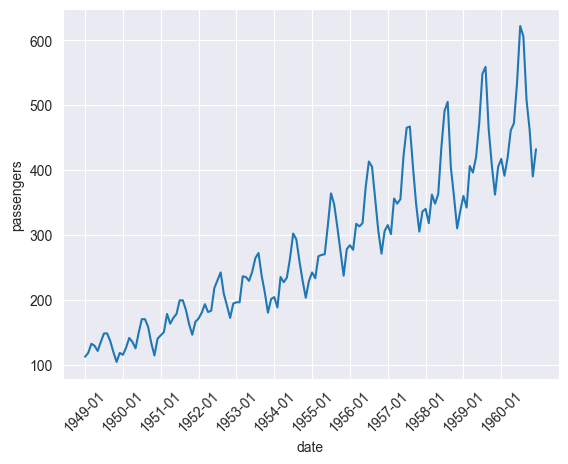

In [3]:
sns.lineplot(data=df, x='date', y='passengers')
plt.xticks(df.date[::12], rotation=45)
plt.show()

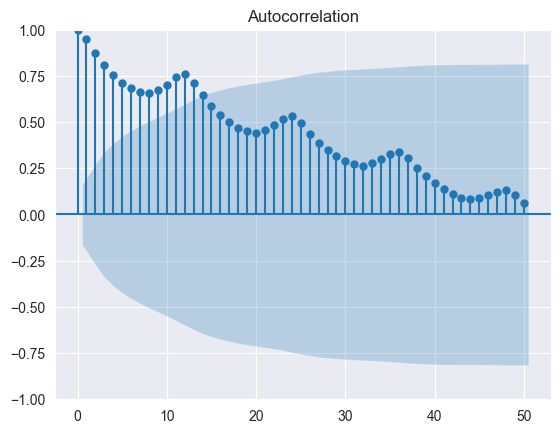

In [4]:
plot_acf(df.passengers, lags=50)
plt.show()

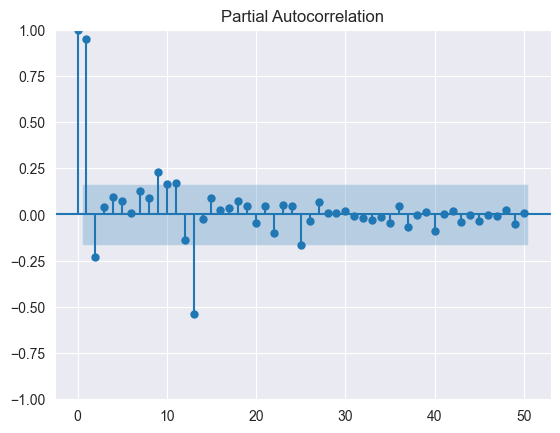

In [5]:
plot_pacf(df.passengers, method='ywm', lags=50)
plt.show()

In [6]:
train = df.iloc[:-24]
test = df.iloc[-24:]

model_to_select = auto_arima(train.passengers, seasonal=True,
                   stepwise=False, trace=True, m=12)
print(model_to_select.summary())

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=910.236, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=912.235, Time=0.10 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=914.228, Time=0.20 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=912.235, Time=0.14 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=914.235, Time=0.20 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=916.229, Time=0.58 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=914.224, Time=0.42 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=916.133, Time=0.99 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=859.115, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=860.575, Time=0.16 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=862.422, Time=0.49 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=860.629, Time=0.18 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=862.453, Time=0.40 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=864.421, Time=0.58 sec
 ARIMA(0,0,1)(

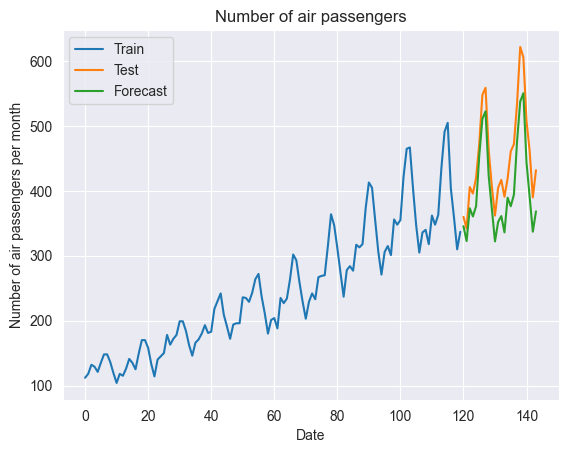

In [7]:
model = ARIMA(train['passengers'], order=(2,0,0), seasonal_order=(1,1,2,12))
model_fit = model.fit()

forecast = model_fit.forecast(len(test), alpha=0.05)

# Візуалізація прогнозу та реальних значень
sns.lineplot(train.passengers, label='Train')
sns.lineplot(test.passengers, label='Test')
sns.lineplot(x= test.index, y=forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of air passengers per month')
plt.title('Number of air passengers')
plt.legend()
plt.show()

In [9]:
# Прогнозуємо значення на весь доступний період
forecast = model_fit.forecast(len(test), alpha=0.05)

# Обчислюємо метрики
mae_train_b = mean_absolute_error(train['passengers'], model_fit.fittedvalues)
rmse_train_b = np.sqrt(mean_squared_error(train['passengers'], model_fit.fittedvalues))
mape_train_b = mean_absolute_percentage_error(train['passengers'], model_fit.fittedvalues)

print(f'MAE train: {mae_train_b: .2f}\n'
      f'MAE train: {rmse_train_b: .2f}\n'
      f'MAPE train:{mape_train_b: .2f}')

mae_test_b = mean_absolute_error(test['passengers'], forecast)
rmse_test_b = np.sqrt(mean_squared_error(test['passengers'], forecast))
mape_test_b = mean_absolute_percentage_error(test['passengers'], forecast)

print(f'MAE test: {mae_test_b: .2f}\n'
      f'MAE test: {rmse_test_b: .2f}\n'
      f'MAPE test:{mape_test_b: .2f}')

MAE train:  19.11
MAE train:  41.14
MAPE train: 0.13
MAE test:  48.14
MAE test:  51.90
MAPE test: 0.11


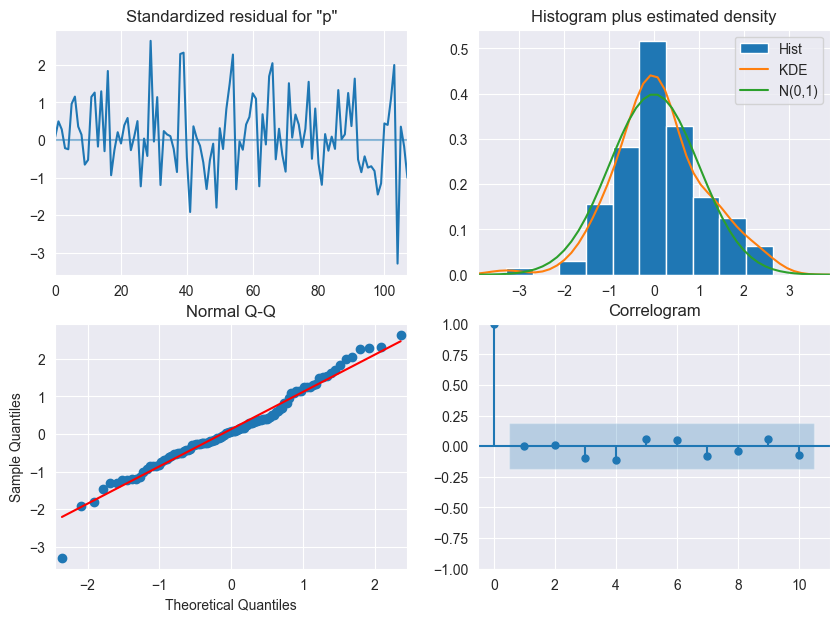

In [10]:
fig = model_fit.plot_diagnostics(figsize=(10,7))

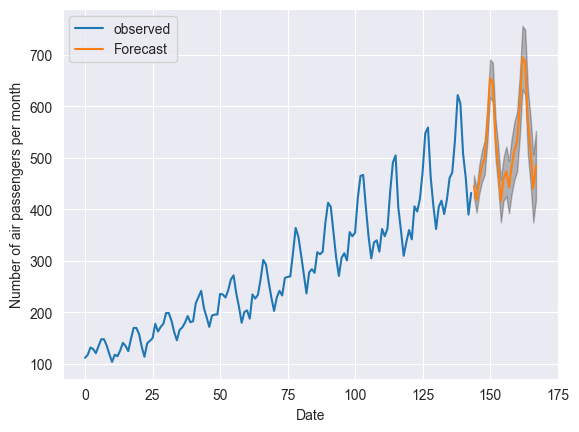

In [11]:
# Прогнозуємо значення на весь доступний період
model = ARIMA(df['passengers'], order=(2,0,0), seasonal_order=(1,1,2,12))
model_fit = model.fit()

pred_uc = model_fit.get_forecast(steps=12*2)
pred_ci = pred_uc.conf_int()

ax = df['passengers'].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers per month')

plt.legend()
plt.show()

### Датасет `temperature`

In [12]:
df = pd.read_csv('temperature.csv')
df.rename(columns={'Date': 'date',
                   'Temp': 'temp'}, inplace=True)
df.head()

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


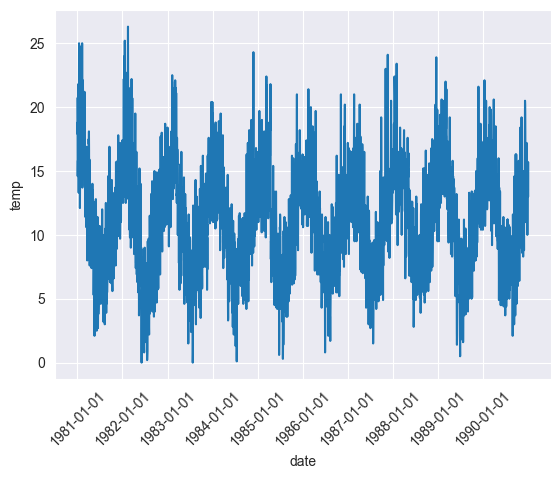

In [13]:
sns.lineplot(data=df, x='date', y='temp')
plt.xticks(df.date[::365], rotation=45)
plt.show()

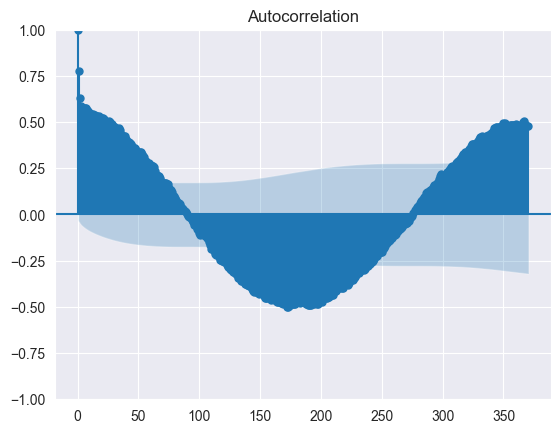

In [14]:
plot_acf(df.temp, lags=370)
plt.show()

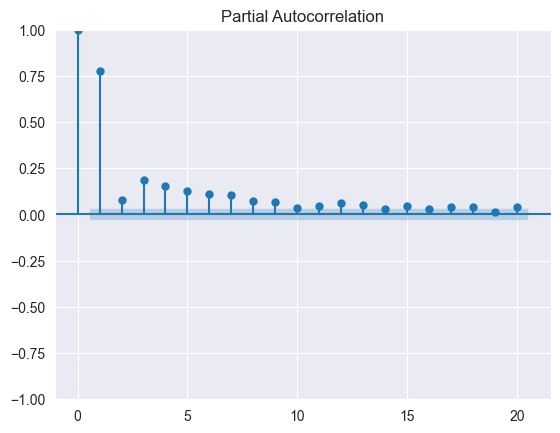

In [15]:
plot_pacf(df.temp, method='ywm', lags=20)
plt.show()

In [16]:
train = df.iloc[:-365]
test = df.iloc[-365:]

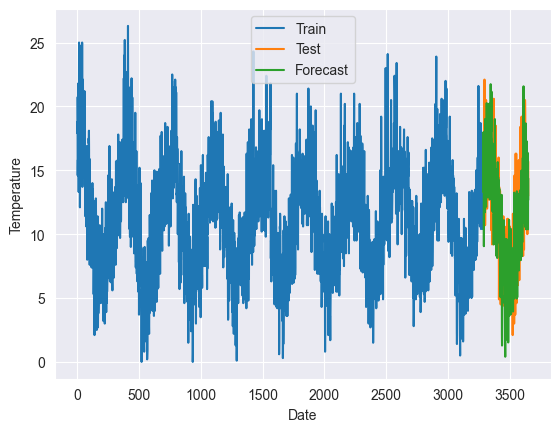

In [17]:
model = ARIMA(train['temp'], order=(5,0,1), seasonal_order=(0,1,0,365))
model_fit = model.fit(method='innovations_mle', low_memory=True, cov_type='none')

forecast = model_fit.get_forecast(len(test))

# Візуалізація прогнозу та реальних значень
sns.lineplot(train.temp, label='Train')
sns.lineplot(test.temp, label='Test')
sns.lineplot(x= test.index, y=forecast.predicted_mean, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [34]:
# Прогнозуємо значення на весь доступний період
forecast = model_fit.forecast(len(test), alpha=0.05)

# Обчислюємо метрики
mae_train_a = mean_absolute_error(train['temp'], model_fit.fittedvalues)
rmse_train_a = np.sqrt(mean_squared_error(train['temp'], model_fit.fittedvalues))
mape_train_a = mean_absolute_percentage_error(train['temp'][-365:], model_fit.fittedvalues[-365:])

print(f'MAE train: {mae_train_a: .2f}\n'
      f'MAE train: {rmse_train_a: .2f}\n'
      f'MAPE train: {mape_train_a: .2f}')

mae_test_a = mean_absolute_error(test['temp'], forecast)
rmse_test_a = np.sqrt(mean_squared_error(test['temp'], forecast))
mape_test_a = mean_absolute_percentage_error(test['temp'], forecast)

print(f'MAE test: {mae_test_a: .2f}\n'
      f'MAE test: {rmse_test_a: .2f}\n'
      f'MAPE test: {mape_test_a: .2f}')

MAE train:  3.69
MAE train:  5.23
MAPE train:  0.33
MAE test:  2.87
MAE test:  3.66
MAPE test:  0.28


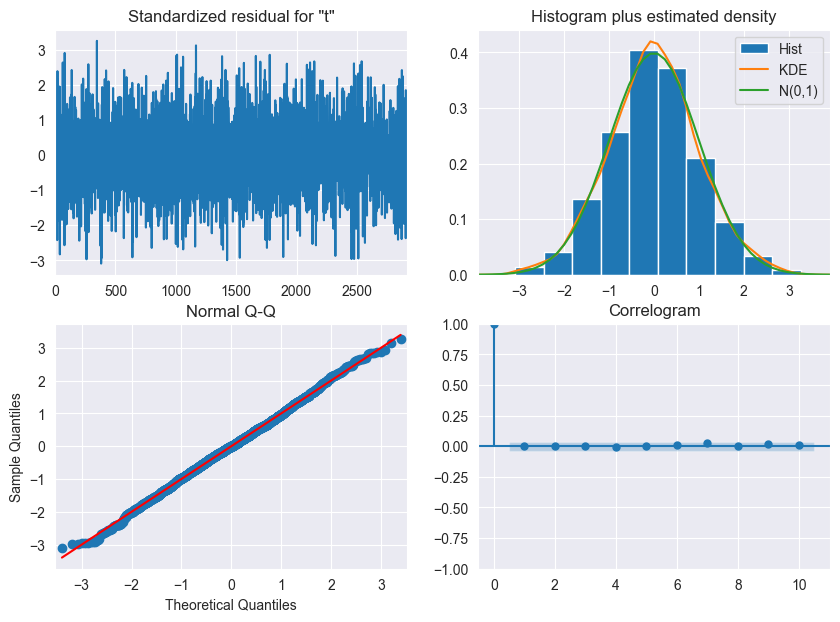

In [35]:
fig = model_fit.plot_diagnostics(figsize=(10,7))

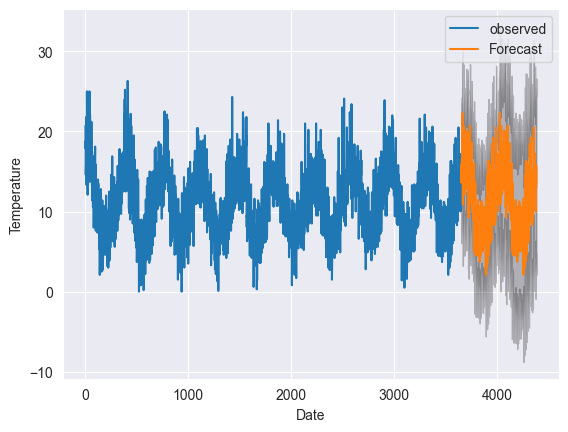

In [36]:
# Прогнозуємо значення на весь доступний період
model = ARIMA(df['temp'], order=(5,0,1), seasonal_order=(0,1,0,365))
model_fit = model.fit(method='innovations_mle', low_memory=True, cov_type='none')

pred_uc = model_fit.get_forecast(steps=365*2)
pred_ci = pred_uc.conf_int()

ax = df['temp'].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')

plt.legend()
plt.show()

### Порівняння метрик
Оскільки датасети мають різні розмірності досліджуваних показників, порівнювати результати моделей за абсолютними показниками не має сенсу. Тому краще порівняти за відносними, наприклад MAPE:

In [39]:
print(f'MAPE test для датасету passangers: {mape_test_b: .2f}\n'
      f'MAPE test для датасету temperature: {mape_test_a: .2f}')

MAPE test для датасету passangers:  0.11
MAPE test для датасету temperature:  0.28


Результати моделі для датасету `passangers` є кращіми. Але треба враховувати, що датасет `temperature` має більшу частоту часового ряду і як результат більші шуми, що може вплинути на результат моделей.